<a id='Return'></a>

# _Wrangling WeRateDogs tweets data_

By Vítor Almeida - ND111

=========================================================================================================================

## INDEX

### I. [Gather](#Gather)
### II. [Assess](#Assess)
####     ([quality and tydiness issues](#quality_tydiness))

### III. [Clean](#Clean)
### IV. [Visualizations and insights](#Visualizations)

In [1]:
## libraries

# data structure and visualization
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt

# access web page data
import requests as req

# twitter API data
import tweepy

<a id='Gather'></a>

# I. Gather

Data from WeRateDogs tweets were divided into 3 structures - *tweets_archive*, *tweets_img* and *tweets_api* - gathered with three different sources: imported from csv, downloaded with request and extracted using API, respectively.

### I1. tweets archive

In [2]:
# opens twitter archive
tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweets_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# tweet ID Series for further use in API extraction
tweets_archive_ID = tweets_archive['tweet_id']
tweets_archive_ID

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

### I2. image predictions

In [4]:
# requests url data and store in resp object
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = req.get(url)

# creates tsv file with resp content and assign to a DataFrame
with open(url.split('/')[-1], mode='wb') as file:
    file.write(resp.content) 
    tweets_img = pd.read_csv('image-predictions.tsv', sep='\t')

tweets_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### I3.twitter API

In [7]:
# tweepy authentication

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
# appends retweet and favorite counts of each tweet to retweets_favorite dict
retweets_favorite = []
missing_id = []
for tweet_id in  tweets_archive_ID:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        retweets_favorite.append({'tweet_id':tweet_id, 
                                  'retweet_count': tweet_status.retweet_count, 
                                  'favorite_count': tweet_status.favorite_count})
    
    except tweepy.TweepError:
        print("ID {0} was not found and added to missing_id object".format(tweet_id))
        missing_id.append(tweet_id)


ID 888202515573088257 was not found and added to missing_id object
ID 873697596434513921 was not found and added to missing_id object
ID 872668790621863937 was not found and added to missing_id object
ID 872261713294495745 was not found and added to missing_id object
ID 869988702071779329 was not found and added to missing_id object
ID 866816280283807744 was not found and added to missing_id object
ID 861769973181624320 was not found and added to missing_id object
ID 856602993587888130 was not found and added to missing_id object
ID 851953902622658560 was not found and added to missing_id object
ID 845459076796616705 was not found and added to missing_id object
ID 844704788403113984 was not found and added to missing_id object
ID 842892208864923648 was not found and added to missing_id object
ID 837012587749474308 was not found and added to missing_id object
ID 829374341691346946 was not found and added to missing_id object
ID 827228250799742977 was not found and added to missing_id ob

Rate limit reached. Sleeping for: 624


ID 758740312047005698 was not found and added to missing_id object
ID 754011816964026368 was not found and added to missing_id object
ID 680055455951884288 was not found and added to missing_id object


Rate limit reached. Sleeping for: 625


ID 676957860086095872 was not found and added to missing_id object


In [5]:
# creates txt file containing retweet and favorite counts and
# creates DataFrame object from txt file (or import directly from txt file, if already exists)

with open('tweet_json.txt', mode='r+') as file:
    try:
        file.write(json.dumps(retweets_favorite))
        tweets_api = pd.DataFrame(retweets_favorite, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
    
    except NameError:
        tweets_api = pd.DataFrame(json.loads(file.read()), columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweets_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8159,37469
1,892177421306343426,6040,32199
2,891815181378084864,3997,24272
3,891689557279858688,8312,40783
4,891327558926688256,9007,39004


In [6]:
# creates DataFrame object with retweet and favorite counts
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


#### [return to INDEX](#Return)

<a id='Assess'></a>

# II. Assess 

First, DataFrames were copied and then assessed visually and programmatically.

In [7]:
# creates copies for data assessment
tweets_archive_copy = tweets_archive.copy()
tweets_img_copy = tweets_img.copy()
tweets_api_copy = tweets_api.copy()

### II1. tweets from archive

In [8]:
# sample visualization
tweets_archive_copy.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1655,683391852557561860,NaN,NaN,2016-01-02 20:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Jack (pronounced ""Kevin""). He's a...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
87,875144289856114688,NaN,NaN,2017-06-15 00:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Nugget and Hank. Nugget took Hank's bone....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875144289...,13,10,Nugget,None,None,None,None
986,749064354620928000,NaN,NaN,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749064354...,11,10,Winston,None,None,None,None
1845,675845657354215424,NaN,NaN,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,None,None,pupper,None
484,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,12,10,Olivia,None,None,None,None
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Maddie and Gunner....,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pup is Oliver. Hops around. Has wings...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668142349...,2,10,None,None,None,None,None
1642,684097758874210310,NaN,NaN,2016-01-04 19:43:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lupe. This is how she sleeps. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684097758...,10,10,Lupe,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None


In [9]:
# dataframe summary
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Retweets are include in the present dataset, which is not aligned with project's motivation. 

In [10]:
# check dog names
tweets_archive_copy.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
an            7
Toby          7
Buddy         7
Daisy         7
Oscar         6
Scout         6
Milo          6
Jax           6
Leo           6
Rusty         6
Jack          6
Koda          6
Stanley       6
Bella         6
Dave          6
Louis         5
           ... 
Ferg          1
Dixie         1
Boston        1
Colin         1
Banjo         1
Tedders       1
Mosby         1
Dook          1
Covach        1
Wishes        1
Karma         1
Ralf          1
Rupert        1
Snoop         1
Cal           1
Devón         1
Vixen         1
Glenn         1
Chubbs        1
Chaz          1
Traviss       1
Hall          1
Skittle       1
Jessifer      1
Tanner        1
Monster       1
Geno          1
Stu           1
Pete          1
Suki          1
Name: name, Length: 957,

Despite not having NaNs, dog classes and dog names columns have many None and inconsistent values.

In [13]:
# check for duplicate rows
tweets_archive_copy.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

### II2. tweets from image prediction

In [14]:
# tweets image pred
tweets_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweets_img_copy.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
1750,823939628516474880,https://pbs.twimg.com/media/C284uD8WgAEmMVn.jpg,1,schipperke,0.234076,True,curly-coated_retriever,0.193093,True,Labrador_retriever,0.095197,True
342,672256522047614977,https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg,1,ostrich,0.999004,False,Arabian_camel,0.000512,False,llama,0.000147,False
650,681981167097122816,https://pbs.twimg.com/media/CXbiQHmWcAAt6Lm.jpg,1,Labrador_retriever,0.452577,True,golden_retriever,0.403420,True,beagle,0.069486,True
1093,719704490224398336,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,home_theater,0.059033,False,window_shade,0.038299,False,bathtub,0.035528,False
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
233,670420569653809152,https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg,1,bow_tie,0.268759,False,cardigan,0.153957,False,wig,0.072295,False
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False


In [16]:
# check for consistency of race names
tweets_img_copy.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

### II3. tweets from API

In [17]:
#tweets api 
tweets_api_copy.sample(10)

,tweet_id,retweet_count,favorite_count
1912,674008982932058114,364,1203
1565,686760001961103360,1447,3639
2135,669573570759163904,141,433
1622,683857920510050305,1169,3933
1725,679111216690831360,2679,6132
1649,682406705142087680,1858,7823
1382,699413908797464576,639,2138
1854,675109292475830276,1163,2823
887,757741869644341248,3447,7163
1121,727524757080539137,1274,4591


In [18]:
#tweets api 
tweets_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


<a id='quality_tydiness'></a>

## II4. quality (10 issues)

**tweets from archive:**

- part  of the tweets are retweets;
- in_reply_to columns: unsuitable data type (int);
- datastamp and retweeted_status_timestamp columns: unsuitable datatype (str);
- name column: invalid values ('a', 'an', 'just', 'is', etc);
- dog stage columns: unsuitable datatype (str);
- many rows without a dog stage;

**tweets from image prediction:**

- p1 columns: rows with prediction other than dog races;
- p1 columns: non informative columns labels;
- p1 columns: races names without standard;


**all:**
- tweet id columns: unsuitable datatype (int);


## II5. tydiness (3 issues)

- same observacional unity in 3 different dataframes; 
- tweets from image prediction: one variable in multiple columns (p1, p2, p3);
- tweets from archive: one variable in multiple columns (dog classes);

#### [return to INDEX](#Return)

<a id='Clean'></a>

# III. Clean

Occasionally, quality and tydiness issues were not cleaned in the same order presented in [Assess (II)](#Assess)

## - part  of the tweets are retweets;

**define**

drop rows in which retweeted_status_id are not NaNs;

**code**

In [8]:
# drop non-null retweeted_status rows and retweeted_status columns
retweeted_status_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
tweets_archive_copy = tweets_archive_copy[tweets_archive_copy.retweeted_status_id.isna()].drop(retweeted_status_columns, axis=1)


**test**

In [9]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### - tweet id columns: unsuitable datatype (int);

**define**

change 'tweet_id' columns from int to str object;

**code**

In [10]:
# change dtype and replace in dataframe
tweets_archive_copy['tweet_id'] = tweets_archive_copy['tweet_id'].astype(str)
tweets_img_copy['tweet_id'] = tweets_img_copy['tweet_id'].astype(str)
tweets_api_copy['tweet_id'] = tweets_api_copy['tweet_id'].astype(str)

**test**

In [11]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+ KB


In [12]:
tweets_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [13]:
tweets_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### - in_reply_to columns: unsuitable data type (int);

**define**

change these columns from float to str object;

**code**

In [14]:
in_reply_to_columns = ['in_reply_to_status_id', 'in_reply_to_user_id']
tweets_archive_copy[in_reply_to_columns] = tweets_archive_copy[in_reply_to_columns].astype(str)

**test**

In [15]:
#tweets from dataframe without retweet and reply rows
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: int64(2), object(12)
memory usage: 254.9+ KB


### - timestamp column: unsuitable datatype (str);

**define**

transform timestamp columns dtype to datetime

**code**

In [16]:
tweets_archive_copy['timestamp']= pd.to_datetime(tweets_archive_copy['timestamp'])

**test**

In [17]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 254.9+ KB


In [18]:
tweets_archive_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
77,877736472329191424,nan,nan,2017-06-22 03:54:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,None,None,None,None
223,849412302885593088,nan,nan,2017-04-05 00:04:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None
1587,686749460672679938,nan,nan,2016-01-12 03:20:05,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,None,None,None
1709,680609293079592961,nan,nan,2015-12-26 04:41:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


### - name column: invalid values ('a', 'an', 'just', 'is', etc);

**define**

disregard rows with lowercase names (invalid names)

**code**

In [19]:
# use regex to keep only rows that matches uppercase initials
tweets_archive_copy = tweets_archive_copy[tweets_archive_copy.name.str.match(r'[A-Z]+')]

**test**

In [20]:
#check if all names starts with uppercase
tweets_archive_copy.name.count() == tweets_archive_copy.name.str.match(r'[A-Z]+').count()

True

### - tweets from archive: one variable in multiple columns (dog stages)

**define**

create column 'dog_stage' concatening stage (or stages) from dog stages columns

**code**

In [47]:
other_stages = ['floofer', 'pupper', 'puppo']
tweets_archive_copy['dog_stage'] = tweets_archive_copy.doggo.str.cat(tweets_archive_copy[other_stages])
tweets_archive_copy.dog_stage.value_counts()

NoneNoneNoneNone        1741
NoneNonepupperNone       213
doggoNoneNoneNone         73
NoneNoneNonepuppo         24
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [77]:
tweets_archive_copy.dog_stage = tweets_archive_copy.dog_stage.str.replace("None", "").str.strip("")

In [92]:
# drop remaining columns
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
tweets_archive_copy = tweets_archive_copy.drop(dog_stages, axis=1)

**test**

In [93]:
tweets_archive_copy.dog_stage.value_counts()

                1741
pupper           213
doggo             73
puppo             24
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [94]:
tweets_archive_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1007,747600769478692864,nan,nan,2016-06-28 01:21:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,
1565,688064179421470721,nan,nan,2016-01-15 18:24:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,
1251,710997087345876993,nan,nan,2016-03-19 01:11:29,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,
1540,689659372465688576,nan,nan,2016-01-20 04:03:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ricky. He's being escorted out of the ...,https://twitter.com/dog_rates/status/689659372...,8,10,Ricky,
1278,708853462201716736,nan,nan,2016-03-13 03:13:29,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lucy. She doesn't understand fetch. 8/...,https://vine.co/v/iHl2UDEBZ95,8,10,Lucy,


In [95]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2071 non-null object
in_reply_to_status_id    2071 non-null object
in_reply_to_user_id      2071 non-null object
timestamp                2071 non-null datetime64[ns]
source                   2071 non-null object
text                     2071 non-null object
expanded_urls            2013 non-null object
rating_numerator         2071 non-null int64
rating_denominator       2071 non-null int64
name                     2071 non-null object
dog_stage                2071 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 194.2+ KB


### - many rows without a dog class;

**define**

drop unclassified dog rows and assign the resulting DataFrame to a separated object;

**code**

In [98]:
tweets_archive_dog_stage = tweets_archive_copy[tweets_archive_copy.dog_stage != ""]

**test**

In [99]:
tweets_archive_dog_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 9 to 2017
Data columns (total 11 columns):
tweet_id                 330 non-null object
in_reply_to_status_id    330 non-null object
in_reply_to_user_id      330 non-null object
timestamp                330 non-null datetime64[ns]
source                   330 non-null object
text                     330 non-null object
expanded_urls            324 non-null object
rating_numerator         330 non-null int64
rating_denominator       330 non-null int64
name                     330 non-null object
dog_stage                330 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 30.9+ KB


In [100]:
tweets_archive_dog_stage.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
12,889665388333682689,nan,nan,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
14,889531135344209921,nan,nan,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo
29,886366144734445568,nan,nan,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,nan,nan,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo


### - tweets from image prediction: one variable in multiple columns (p1, p2, p3);

**define**

drop p2 and p3 columns and maintain p1 as the highest coefficient prediction

**code**

In [101]:
tweets_img_copy = tweets_img_copy.drop(labels=['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

**test**

In [102]:
tweets_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


### - p1 columns: rows with prediction other than dog races;

**define**

disregard 'p1_dog' rows with False values

**code**

In [103]:
tweets_img_copy = tweets_img_copy[tweets_img_copy.p1_dog == True]

**test**

In [104]:
#check if all dog predictions are True
tweets_img_copy.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [105]:
# drops p1_dog column
tweets_img_copy = tweets_img_copy.drop('p1_dog', axis=1)

In [106]:
tweets_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 71.8+ KB


### -  p1 columns: non informative columns labels;

**define**

rename labels of prediction columns to more informative ones

**code**

In [107]:
tweets_img_copy = tweets_img_copy.rename(index=str, columns = {'p1': 'predict_race', 'p1_conf': 'predict_conf'})

**test**

In [108]:
tweets_img_copy.head(10)

,tweet_id,jpg_url,img_num,predict_race,predict_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672


### - p1 column: races names without standard;

**define**

replace races names elements with lowercase and underscore

**code**

In [109]:
tweets_img_copy['predict_race'] = tweets_img_copy.predict_race.str.lower().replace("-", "_")

**test**

In [110]:
tweets_img_copy.predict_race.value_counts()

golden_retriever               150
labrador_retriever             100
pembroke                        89
chihuahua                       83
pug                             57
chow                            44
samoyed                         43
toy_poodle                      39
pomeranian                      38
cocker_spaniel                  30
malamute                        30
french_bulldog                  26
chesapeake_bay_retriever        23
miniature_pinscher              23
german_shepherd                 20
siberian_husky                  20
staffordshire_bullterrier       20
cardigan                        19
maltese_dog                     18
eskimo_dog                      18
shetland_sheepdog               18
beagle                          18
shih-tzu                        17
lakeland_terrier                17
rottweiler                      17
italian_greyhound               16
kuvasz                          16
great_pyrenees                  14
west_highland_white_

### - same observacional unity in 3 different tables;


**define**

join the three dataframes and keep only 'tweet_id' rows that match between them;

**code**

In [111]:
twitter_archive_master = tweets_archive_copy.merge(tweets_api_copy, on='tweet_id', how='inner').merge(tweets_img_copy, on='tweet_id', how='inner')

**test**

In [112]:
# joined DataFrame
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 17 columns):
tweet_id                 1400 non-null object
in_reply_to_status_id    1400 non-null object
in_reply_to_user_id      1400 non-null object
timestamp                1400 non-null datetime64[ns]
source                   1400 non-null object
text                     1400 non-null object
expanded_urls            1400 non-null object
rating_numerator         1400 non-null int64
rating_denominator       1400 non-null int64
name                     1400 non-null object
dog_stage                1400 non-null object
retweet_count            1400 non-null int64
favorite_count           1400 non-null int64
jpg_url                  1400 non-null object
img_num                  1400 non-null int64
predict_race             1400 non-null object
predict_conf             1400 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(10)
memory usage: 196.9+ KB


In [113]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,predict_race,predict_conf
0,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6040,32199,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
1,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,3997,24272,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
2,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9007,39004,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
3,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,2988,19604,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595
4,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,1984,11445,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703


In [114]:
# exports master twitter archive to CSV
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [116]:
# exports twitter_archive with dog classified tweets to CSV
tweets_archive_dog_stage.to_csv('twitter_archive_classified.csv')

#### [return to INDEX](#Return)

<a id='Visualizations'></a>

## IV. Visualizations and insights

### IV1. Prediction confiability per dog race
<a id='number_races'></a>

In [117]:
# means of variables per predict_race, descending order
race_mean = twitter_archive_master.groupby('predict_race').mean().sort_values('predict_conf', ascending=False)

# number of dog races
race_mean.count()['predict_conf']

111

In [118]:
# regards predict_conf mean values above 75%
race_conf_bar = race_mean.query('predict_conf > 0.75')
race_conf_bar

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,predict_conf
predict_race,,,,,,
komondor,11.500000,10.0,2656.500000,13622.500000,2.000000,0.958819
clumber,27.000000,10.0,1730.000000,6865.000000,1.000000,0.946718
brittany_spaniel,10.428571,10.0,1386.142857,5566.714286,1.000000,0.874545
black-and-tan_coonhound,14.000000,10.0,7624.000000,32183.000000,4.000000,0.854861
keeshond,10.250000,10.0,1603.750000,4628.750000,1.500000,0.844431
bernese_mountain_dog,11.333333,10.0,1637.777778,7127.777778,1.222222,0.818558
bull_mastiff,10.400000,10.0,1379.000000,5746.600000,1.000000,0.815618
french_bulldog,11.240000,10.0,4523.600000,18058.520000,1.120000,0.777413
pug,10.274510,10.0,1745.176471,5785.901961,1.137255,0.773344


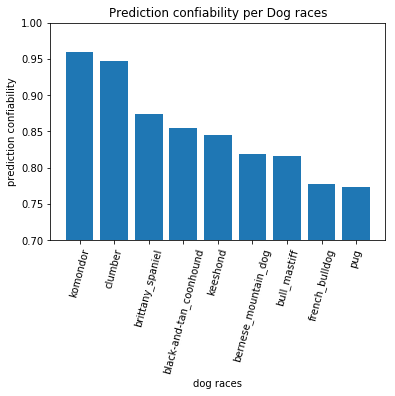

In [119]:
# bar plot
x = race_conf_bar.index
y = race_conf_bar.predict_conf

plt.bar(x=x, height=y, align='center')
plt.title('Prediction confiability per Dog races')
plt.xlabel('dog races')
plt.xticks(rotation=75)
plt.ylabel('prediction confiability')
plt.ylim(0.7, 1)
plt.show()

Among all [111 dog races](#number_races), only 9 races (8%) were predicted with more than 75% of confiability by the algorithm. The highest confiability achieved came from **komodor** race, which is reasonable, since this race has a very prominent visual pattern. 

### IV2. Percentage of dog stages represented in tweets

In [137]:
dog_class_count = tweets_archive_dog_stage.dog_stage.value_counts()[['pupper', 'doggo', 'puppo', 'floofer']]
dog_class_count

pupper     213
doggo       73
puppo       24
floofer      9
Name: dog_stage, dtype: int64

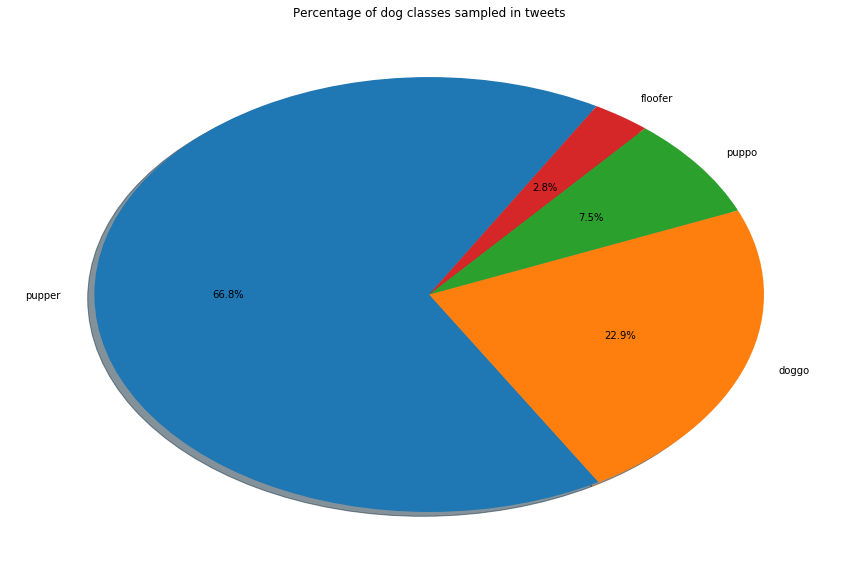

In [138]:
# pie plot
plt.figure(figsize = (15,10));
plt.pie(dog_class_count, labels=dog_class_count.index, shadow=True, autopct='%1.1f%%', startangle=60);
plt.title('Percentage of dog classes sampled in tweets')
plt.show()

The most well represented class of dogs in the tweets is the **pupper** (64.5%), followed by the **doggo** ones (22.1%), beign the latter a sequel of the former - as the dogtionary points. Since nowadays many people live in small apartments, the pupper community must have been favoured as the main kind of dog pet. Or it just because they are more cute, who knows. Additionally, it appears that people are avoiding the furred ones.

### IV3. Retweet and favorite counts per year

In [126]:
# DataFrame with timestamp as index
retweet_favorite_plot = twitter_archive_master.set_index('timestamp')

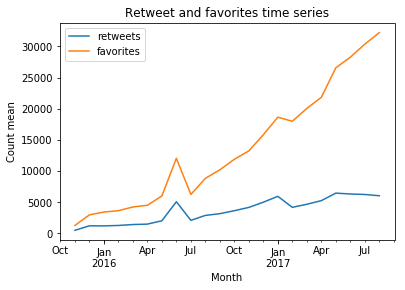

In [127]:
# line plot
retweet_favorite_plot.retweet_count.resample('M').mean().plot()
retweet_favorite_plot.favorite_count.resample('M').mean().plot()
plt.title('Retweet and favorites time series');
plt.xlabel('Month');
plt.ylabel('Count mean');
plt.legend(('retweets', 'favorites'));


During the period between October 2015 and August 2017, **both retweet and favorite counts have increased**, what is to be expected as WeRateDogs popularity grown. Nevertheless, two findings were observed. The favorite counts increased in a greater fashion than did the retweets - its curve have a greater slope. In the other hand, mean of retweets counts stabilized next to 5000 per month, after January 2017.

It appears that most of the followers and general people prefer to favorite and receive more from the tweets, rather than share it. This could be a possible outcome for most of the twitter accounts that gets popular over time.

Another finding was **a peak of both retweet and favorite counts** around June 2016. Some code were made to evaluate what was so special about these tweets.

In [128]:
# Jun 2016 most represented dog races
retweet_favorite_plot["2016-06"].predict_race.value_counts().head()

shetland_sheepdog     5
labrador_retriever    5
golden_retriever      4
toy_poodle            4
malamute              3
Name: predict_race, dtype: int64

In [129]:
# Jun 2016 three most retweeted tweets
retweet_favorite_plot["2016-06"].sort_values('retweet_count', ascending=False).head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,predict_race,predict_conf
timestamp,,,,,,,,,,,,,,,,
2016-06-18 18:26:18,744234799360020481,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,82209,161805,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,0.825333
2016-06-04 23:31:25,739238157791694849,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,60833,119562,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,eskimo_dog,0.503372
2016-06-05 19:47:03,739544079319588864,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,https://twitter.com/dog_rates/status/739544079...,10,10,None,,22417,40895,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,labrador_retriever,0.967397


Among the 5 dog races best represented in tweets from June 2016, the first two are tied having both 5 tweets (*shetland_sheepdog* and *labrador_retriever*).

The most retweeted (82209) and favorited (161805) tweet coming from this period was about a *labrador_retriever*. This dog race is one of the most docile and friendly. It is hard to simple avoid a tweet picture about it. As the data from this "peak event" shows, WeRateDogs should invest in more *labrador_retriever* if popularity goes bad.

#### [return to INDEX](#Return)